# Boston Housing Price Prediction

### Data collected from - http://archive.ics.uci.edu/ml/machine-learning-databases/housing/


#### Importing basic libraries numpy and panda


In [78]:
import numpy as np
import pandas as pd


In [79]:
df = pd.read_csv('housing.data')

In [80]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


#### the issue with above data is, it is not comma delimited, and it also does'nt have headers | - in such cases will use the inbuilt method - delim_whitespace

In [81]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

In [82]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


#### Attribute information given in data :
#####    Attribute Information:
1.  **CRIM**      per capita crime rate by town<br>
2.  **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3.  **INDUS**     proportion of non-retail business acres per town<br>
4.  **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
5.  **NOX**       nitric oxides concentration (parts per 10 million)<br>
6.  **RM**        average number of rooms per dwelling<br>
7.  **AGE**       proportion of owner-occupied units built prior to 1940<br>
8.  **DIS**       weighted distances to five Boston employment centres<br>
9.  **RAD**       index of accessibility to radial highways<br>
10. **TAX**       full-value property-tax rate per 10,000 <br>
11. **PTRATIO**   pupil-teacher ratio by town <br>
12. **BK**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
13. **LSTAT**     % lower status of the population <br>
14. **MEDV**      Median value of owner-occupied homes in 1000's <br>


In [83]:
columnName = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS','RAD','TAX','PTRATIO','BK','LSTAT','MEDV']


In [84]:
df.columns = columnName

In [85]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [86]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Exploratory Data analysis

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
col_study=['ZN','INDUS', 'NOX', 'RM']

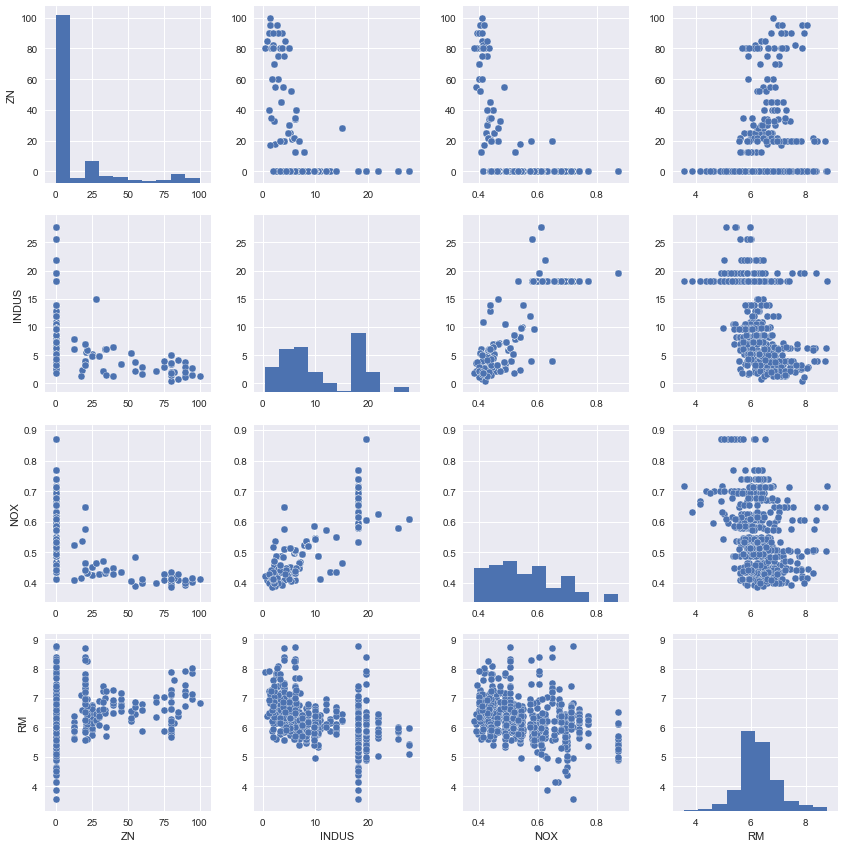

In [89]:
sns.pairplot(df[col_study], size=3);
plt.show()

In [90]:
colStudyPract = ['PTRATIO', 'BK', 'MEDV']

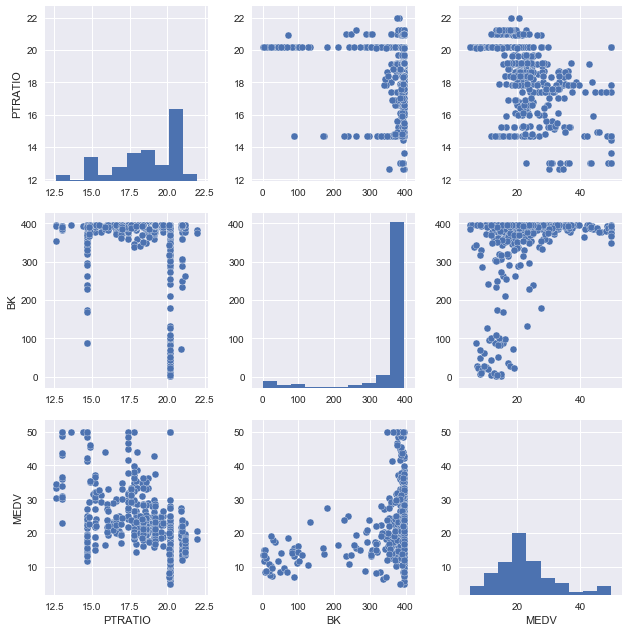

In [91]:
sns.pairplot(df[colStudyPract], size=3);
plt.show()

## Correlation Analysis and Feature Selection

In [92]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


### Modifying data to limit it upto 3 decimal points for ease read

In [93]:
pd.options.display.float_format = '{:,.2f}'.format

In [94]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


### Generating heatmap using seaborn package
##### cmap represents the color (Greens, Blues.. etc) used in heatmap for presentations

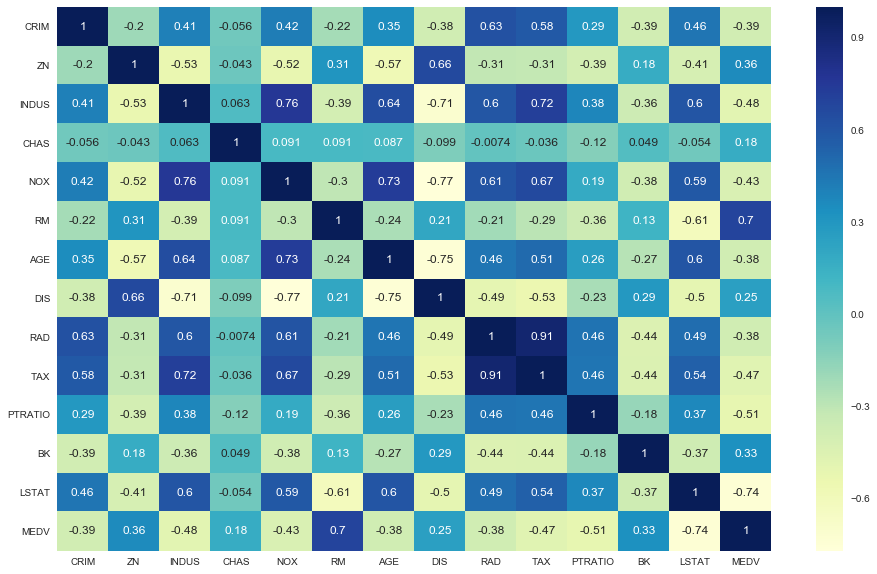

In [95]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Heatmap with 4 values i.e. CRIM, ZN, INDUS, CHAS

In [96]:
col_heatmap = ["CRIM", "ZN", "INDUS", "CHAS", "MEDV"]

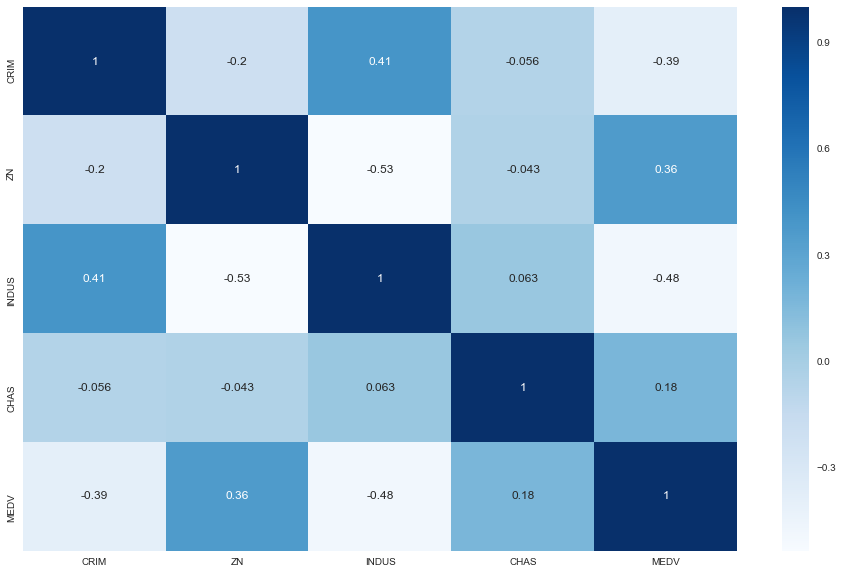

In [97]:
plt.figure(figsize=(16,10))
sns.heatmap(df[col_heatmap].corr(), annot=True, cmap="Blues")
plt.show()

### Linear Regression with Scikit- Learn

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


### Room per Dwelling, formated to matrix form -1,1 for scikit learn

In [99]:
X = df['RM'].values.reshape(-1,1)

### y is the target variable to create model

In [100]:
y = df['MEDV'].values

### Model Selected as Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

### Fit the model to data

In [103]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
model.coef_

array([ 9.10210898])

In [105]:
model.intercept_

-34.670620776438554

### Using seaborn to create visualisation charts

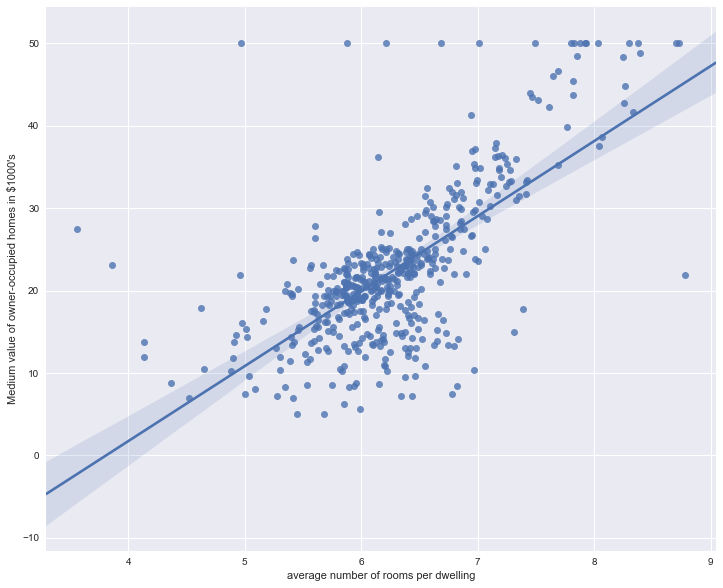

In [106]:
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Medium value of owner-occupied homes in $1000's")
plt.show()

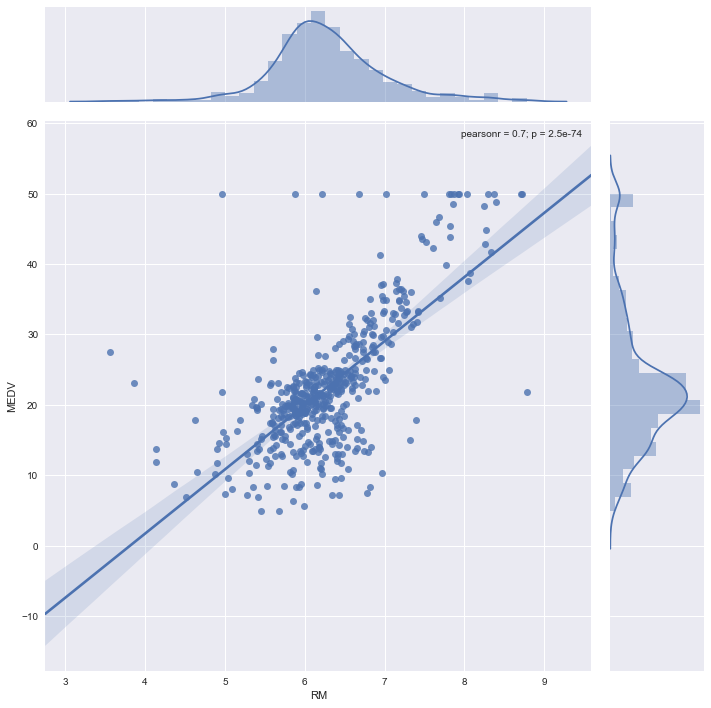

In [107]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', size=10);
plt.show()

### LSTAT analysis with taking base as MEDV

### using Linear Regression Model

In [108]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [109]:
LX = df['LSTAT'].values.reshape(-1,1)

In [110]:
Ly = df['MEDV'].values

In [111]:
model.fit(LX,Ly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
model.coef_

array([-0.95004935])

In [113]:
model.intercept_

34.55384087938311

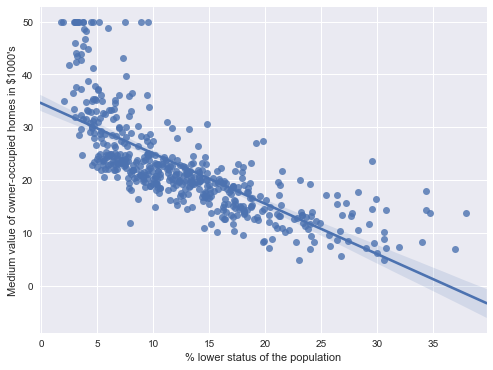

In [114]:
plt.figure(figsize=(8,6));
sns.regplot(LX,Ly);
plt.xlabel('% lower status of the population')
plt.ylabel("Medium value of owner-occupied homes in $1000's")
plt.show()

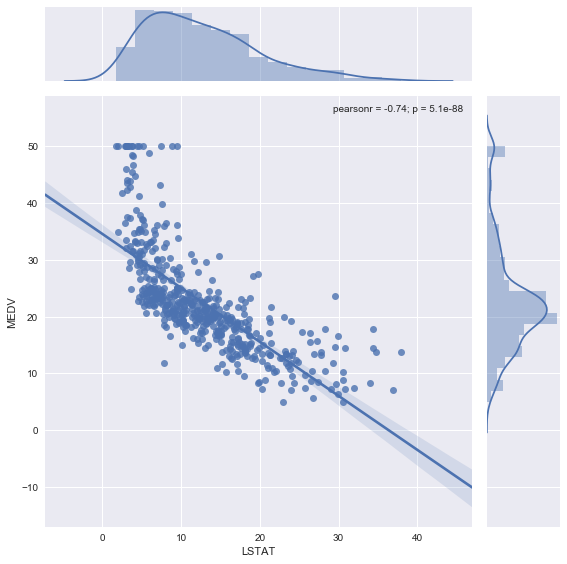

In [115]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', size=8);
plt.show()

#### The above chart shows that lower status of the population increases the price comes down, but to certain limit, after that price dont change

_________________________

## Using Robust Regression for analysis

### Random Sample Consensus (RANSAC) Algorithm

### link : http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html

#### Ransac is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete dataset

#### Ransac is a non deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations.

Each Iteration performs the following steps: <br>
1) Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).<br>
2) Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).<br>
3) Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.<br>
4) Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.<br>

#### These steps are performed either a maximum number of times (max_trials) or until one of the special stop criteria are met (see stop_n_inliers and stop_score). The final model is estimated using all inlier samples (consensus set) of the previously determined best model.

##### Analysis using RM

In [116]:
X = df['RM'].values.reshape(-1,1)

In [117]:
y = df['MEDV'].values

In [118]:
from sklearn.linear_model import RANSACRegressor

In [119]:
ransac = RANSACRegressor()
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [120]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [121]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

In [122]:
sns.set(style='darkgrid', context='notebook')

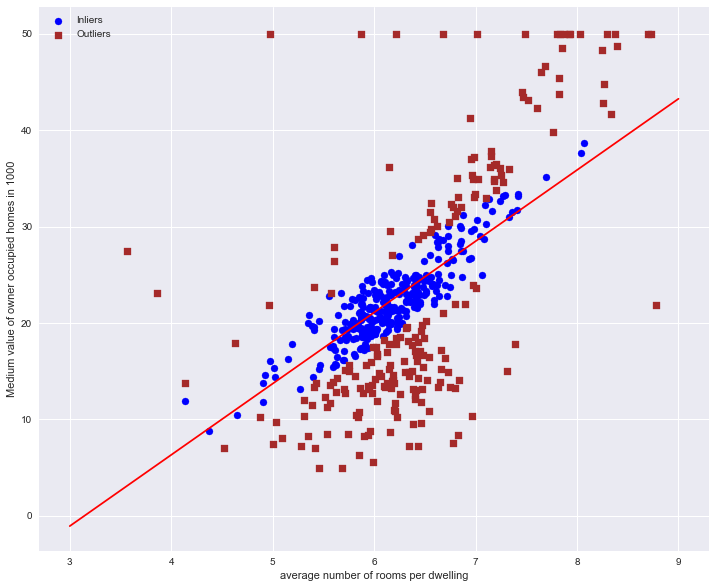

In [123]:
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Medium value of owner occupied homes in 1000')
plt.legend(loc='upper left')
plt.show()

### Analysis using LSTAT

In [124]:
LX = df['LSTAT'].values.reshape(-1,1)

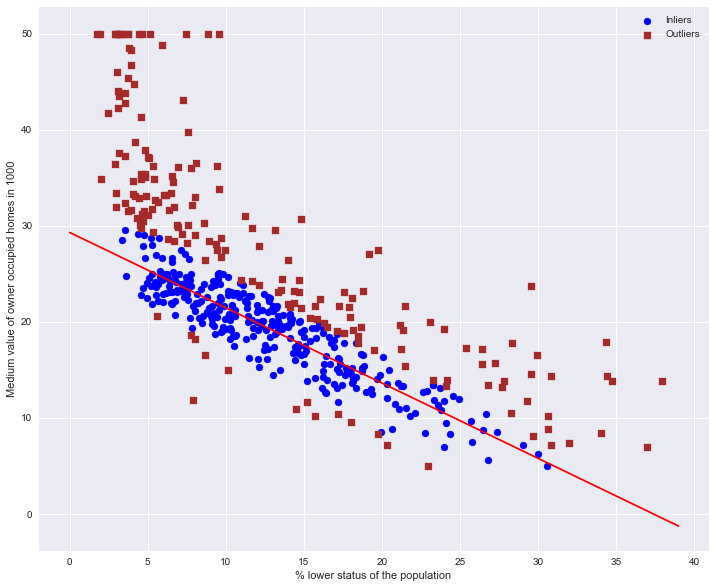

In [125]:
Ly = df['MEDV'].values
ransac.fit(LX,Ly)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,40,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(LX[inlier_mask], Ly[inlier_mask], c='blue', marker='o', label = 'Inliers')
plt.scatter(LX[outlier_mask], Ly[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population ')
plt.ylabel('Medium value of owner occupied homes in 1000')
plt.legend(loc='upper right')
plt.show()

## Performance Evaluation of Regression Model

In [126]:
from sklearn.model_selection import train_test_split

In [150]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

_______________________________________________________________________________________________________________________

### Method 1: Residual Analysis

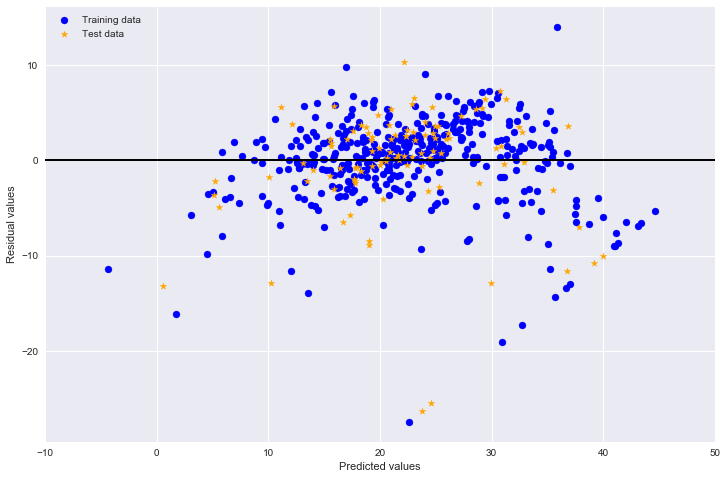

In [151]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= -10, xmax=50, lw=2, color='k')
plt.xlim([-10,50])
plt.show()

### Method 2: Mean Squared Error (MSE)

<center> \begin{equation*} MSE = \frac{1}{n} \left(\sum_{i=1}^n \right) \left(y_i - dot{yi} \right)^2 \end{equation*}</center>

* It is useful for comparing different regression models
* The average value of the sums of squared error cost function
* For tuning parameters via a grid search and cross-validation

In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [153]:
mean_squared_error(y_test, y_test_pred)

33.448979997673504

### Method 3: Coefficient of Determination, $R^2$

<center> \begin{equation*} R^2 = 1 - \frac{SSE}{SST} \end{equation*}</center>

* SSE is Sum of Squared errors
* SST is Total sum of squares

In [154]:
from sklearn.metrics import r2_score

In [155]:
r2_score(y_train, y_train_pred)

0.77301355692642337

In [156]:
r2_score(y_test, y_test_pred)

0.58922238491828793

_____________________________________________________________________

## Near Perfect Model Looks like

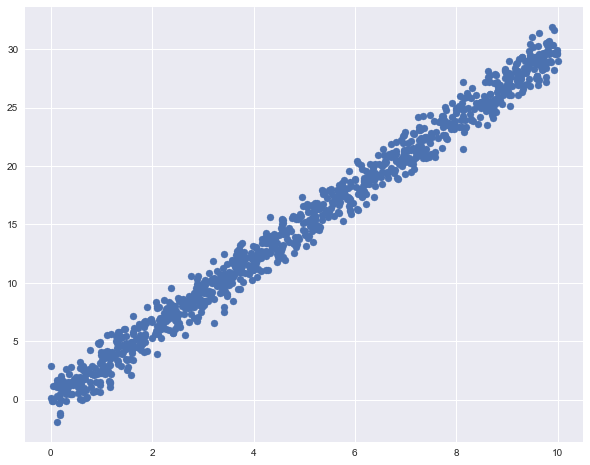

In [157]:
generate_random= np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize=(10,8))
plt.scatter(x,y);
plt.show()

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1,1), y_train)

y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

# Method 1 : Residual Analysis

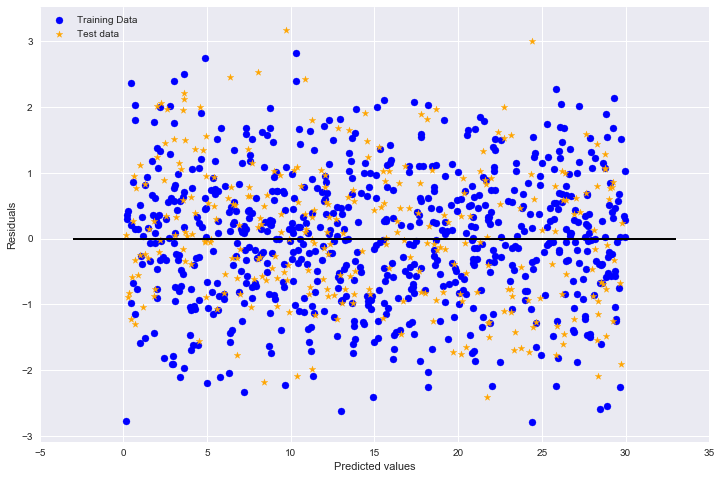

In [161]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c= 'blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= -3, xmax=33, lw=2, color='k')
plt.xlim([-5,35])
plt.show()

# Method 2: Mean Squared Error(MSE)

In [162]:
mean_squared_error(y_train, y_train_pred)

1.0222878402853968

In [163]:
mean_squared_error(y_test, y_test_pred)

1.055160184255745

# Method 3 : Coefficient of Determination, $R^2$

In [164]:
r2_score(y_train, y_train_pred)

0.98652336680576436

In [165]:
r2_score(y_test, y_test_pred)

0.98681702654567416

***

# Performance Evaluation of Regression Model using CRIM

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X = df['CRIM'].values.reshape(-1,1)
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Residual Analysis for CRIM

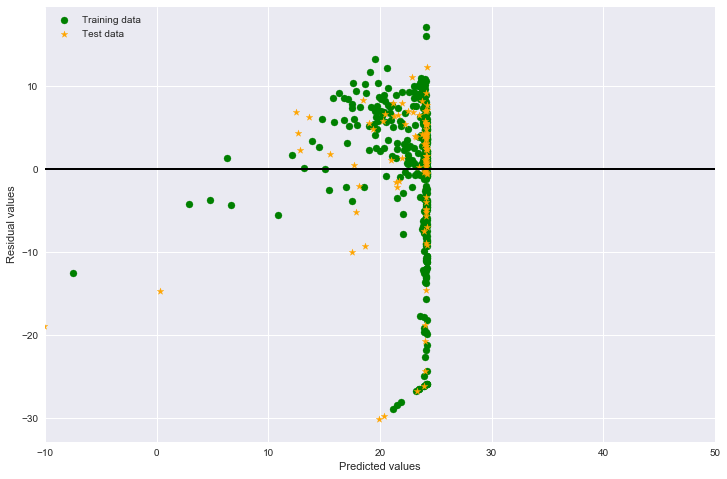

In [168]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin= -10, xmax=50, lw=2, color='k')
plt.xlim([-10,50])
plt.show()

# Mean Squared Error (MSE)

In [169]:
mean_squared_error(y_train, y_train_pred)

70.751856234760268

In [170]:
mean_squared_error(y_test, y_test_pred)

76.386741576460722

# Coefficient of Determination, $R^2$

In [171]:
r2_score(y_train, y_train_pred)

0.16903024616457574

In [172]:
r2_score(y_test, y_test_pred)

0.061915683801896493